In [2]:
import re
import zipfile
import os
import textract
import pandas as pd
import nltk
#nltk.download('punkt')

In [3]:
from nltk import word_tokenize

In [4]:
zip_filepath=r"C:\Users\KARTHIK\Downloads\Resumes-20220812T140008ZIP.zip" 

In [5]:
with zipfile.ZipFile(zip_filepath,'r') as zip_read:
    zip_read.extractall(r"C:\Users\KARTHIK\Downloads") 
    zip_extract=zip_read.namelist()

In [6]:
zip_extract

['Resumes/React Developer_Haripriya.docx',
 'Resumes/React Developer_Naveen sadhu.docx',
 'Resumes/Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Resumes/Internship_Susovan Bag_Musquare Technologies.docx',
 'Resumes/Internship_Ravali_Musquare Technologies (1).docx',
 'Resumes/React Developer_Pragnya.docx',
 'Resumes/Reactjs Developer_M Lokesh.docx',
 'Resumes/Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'Resumes/Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'Resumes/React Developer_Sarala Madasu-converted.docx',
 'Resumes/React Developer_Kamalakar Reddy.docx',
 'Resumes/React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Resumes/React JS Developer_AnjaniPriyadarshini.doc',
 'Resumes/React Developer_Vinay Reddy.doc',
 'Resumes/Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'Resumes/Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Resumes/React Developer_Thirupathiamma.docx',
 'Resumes/React JS Develop

In [7]:
len(zip_extract)

79

In [8]:
import docx

def read_docx(file_path):
    try:
        doc = docx.Document(file_path)
        content = ""

        for paragraph in doc.paragraphs:
            content += paragraph.text + "\n"

        return content
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [9]:
def read_resume(directory):
    file_path = []
    category = []
    file_content = []
    file_name = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            print(file)
            file_path.append(os.path.join(root, file))
            folder_name = os.path.basename(root)

            if folder_name=="Resumes":
               folder_name="React_JS"

            elif re.search(r'\bresumes\b',folder_name,flags=re.IGNORECASE):
               folder_name = folder_name.replace("resumes", "").strip()
                
            category.append(folder_name)
            file_name.append(file)

          
            content = read_docx(os.path.join(root, file))
            file_content.append(content)
        

    # Create a DataFrame
    df = pd.DataFrame({
        'File': file_name,
        'Content': file_content,
        'JobPost': category
    })

    return df

Data=read_resume(r"C:\Users\KARTHIK\Downloads\Resumes")
print("---------------")
print(Data)

Internship_Ravali_Musquare Technologies (1).docx
Internship_Susovan Bag_Musquare Technologies.docx
React Developer_Deepakreddy.docx
React Developer_Haripriya.docx
React Developer_Kamalakar Reddy.docx
React Developer_Naveen sadhu.docx
React Developer_PavasGoswami.doc
An error occurred: file 'C:\Users\KARTHIK\Downloads\Resumes\React Developer_PavasGoswami.doc' is not a Word file, content type is 'application/vnd.openxmlformats-officedocument.themeManager+xml'
React Developer_Pragnya.docx
React Developer_Sarala Madasu-converted.docx
React Developer_Thirupathiamma.docx
React Developer_Vinay Reddy.doc
An error occurred: file 'C:\Users\KARTHIK\Downloads\Resumes\React Developer_Vinay Reddy.doc' is not a Word file, content type is 'application/vnd.openxmlformats-officedocument.themeManager+xml'
React Dev_Krishna Kanth.docx
React Dev_Krishna Kanth_Musquare Technologies.docx
React JS Developer_AnjaniPriyadarshini.doc
An error occurred: file 'C:\Users\KARTHIK\Downloads\Resumes\React JS Developer_

In [10]:
Data

,File,Content,JobPost
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS
...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday
77,Venkateswarlu B_Hexaware.doc,None,workday


In [11]:
!pip3 install matplotlib

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [12]:
import matplotlib.pyplot as plt

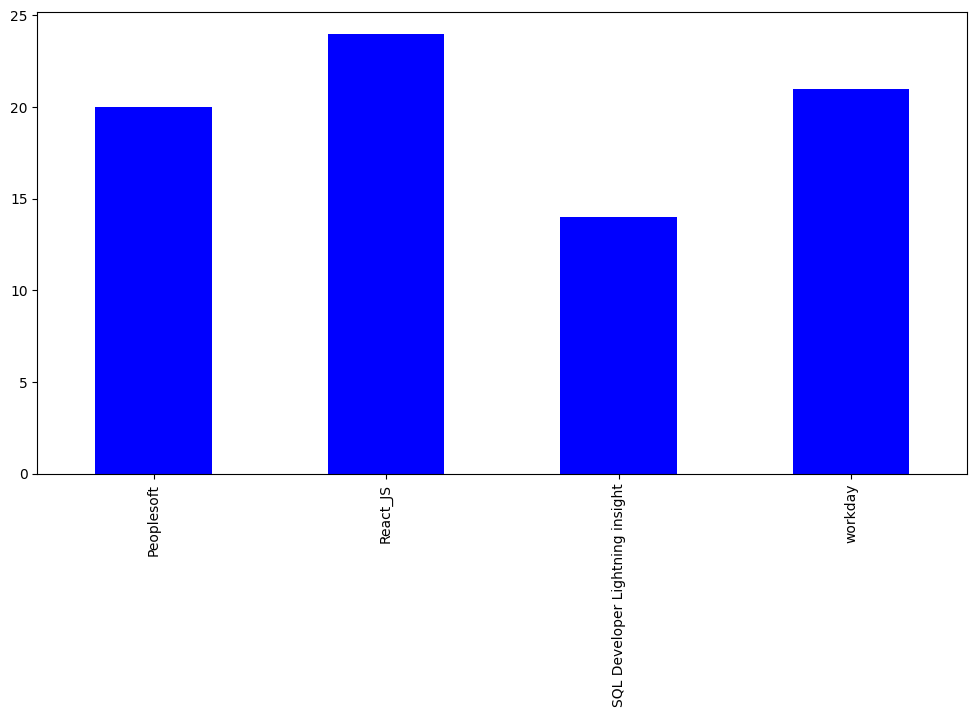

In [13]:
Data['JobPost'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6),color='b')
plt.show()

In [14]:
Data.duplicated().sum()

0

In [15]:
CopyData=Data.copy()

# EDA 

In [16]:
from nltk import word_tokenize

In [17]:
def Cleaned(text):
    tokens = word_tokenize(text)
    details = [Text.strip() for Text in tokens]
    details = [Text for Text in details if Text]
    details = ' '.join(details)
    return details

In [18]:
for index, row in CopyData.iterrows():
    content = row['Content']
    
    # Check if 'Content' is a string; if not, handle it appropriately
    if isinstance(content, str):
        processed_text = Cleaned(content)
    else:
        # Handle non-string data (e.g., convert to string or handle differently)
        processed_text = str(content)
    
    CopyData.at[index, 'ProcessedText'] = processed_text

In [19]:
CopyData

,File,Content,JobPost,ProcessedText
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : https : //www....
...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S.S Role : Wo...
77,Venkateswarlu B_Hexaware.doc,None,workday,None


In [20]:
from nltk.tokenize import TweetTokenizer

In [21]:
def tknzr(details):
  tknzr = TweetTokenizer(strip_handles=True)
  tokens = tknzr.tokenize(details)
  Text = ' '.join(tokens)
  return Text

In [22]:
for index, row in CopyData.iterrows():
    content = row['ProcessedText']
    processed_text = tknzr(content)
    CopyData.at[index, 'ProcessedText'] = processed_text

In [23]:
CopyData

,File,Content,JobPost,ProcessedText
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : https : / / ww...
...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...
77,Venkateswarlu B_Hexaware.doc,None,workday,None


# Extarct Url from Dtails and add to DataFrame

In [24]:
def extract_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    urls = re.findall(url_pattern, text)
    return urls

In [25]:
for index, row in CopyData.iterrows():
    content = row['Content']
    
    try:
        # Check if content is a string or bytes-like object
        if isinstance(content, (str, bytes)):
            processed_text = extract_urls(content)  # Extract URLs from the text

            # Filter out non-string elements and convert them to strings
            processed_text = [str(item) for item in processed_text if isinstance(item, (str, bytes))]

            processed_text_str = ', '.join(processed_text)  # Join the strings
            CopyData.at[index, 'Url'] = processed_text_str
        else:
            # Handle non-string/bytes data appropriately
            CopyData.at[index, 'Url'] = ''  # Set 'Url' to an empty string or handle differently

    except Exception as e:
        # Print the error message and details for debugging
        print(f"Error processing row {index}: {e}")
        CopyData.at[index, 'Url'] = ''  # Set 'Url' to an empty string or handle the error as needed


In [26]:
CopyData

,File,Content,JobPost,ProcessedText,Url
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : https : / / ww...,https://www.linkedin.com/in/kamalakar-reddy-77...
...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,
77,Venkateswarlu B_Hexaware.doc,None,workday,None,



# find phone numbers and remove it

In [27]:
def findphone(text):
  phone_pattern = r'(\+\d{1,3}\s?\d{10})|(\b\d{10}\b)'
  phone_numbers = re.findall(phone_pattern, text)
  phone_numbers = [match[0] or match[1] for match in re.findall(phone_pattern, text)]
  text_without_phone=re.sub(phone_pattern, '', text)
  return phone_numbers,text_without_phone

In [28]:
for index, row in CopyData.iterrows():
    data = row['ProcessedText']
    phone_numbers, text_without_phone = findphone(data)
    CopyData.at[index, 'phone'] = ', '.join(phone_numbers) if phone_numbers else ''
    CopyData.at[index, 'ProcessedText'] = text_without_phone

In [29]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : https : / / ww...,https://www.linkedin.com/in/kamalakar-reddy-77...,
...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,


In [30]:
import string

In [31]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text 

In [32]:
import numpy as np

In [33]:
CopyData['ProcessedText'] = np.vectorize(remove_pattern)(CopyData['ProcessedText'], "@[\w]*")
CopyData.head(10)

,File,Content,JobPost,ProcessedText,Url,phone
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : https : / / ww...,https://www.linkedin.com/in/kamalakar-reddy-77...,
5,React Developer_Naveen sadhu.docx,\nNaveen Sadhu\n\n\nTitle: software developer\...,React_JS,Naveen Sadhu Title : software developer Locati...,,
6,React Developer_PavasGoswami.doc,None,React_JS,None,,
7,React Developer_Pragnya.docx,\nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...,React_JS,PRAGNYA PATTNAIK Expertise : Having around 2 y...,,
8,React Developer_Sarala Madasu-converted.docx,"\n\n 204,Sri geethika prestige,road number 10...",React_JS," 204 , Sri geethika prestige , road number 10...",,
9,React Developer_Thirupathiamma.docx,\n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...,,


# Remove URL and word containing  https

In [34]:
CopyData['ProcessedText'] = CopyData['ProcessedText'].astype(str)
CopyData['ProcessedText'] = CopyData['ProcessedText'].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))

In [35]:
clean=[]

In [36]:
for index, row in CopyData.iterrows():
    no_links = [word for word in row.ProcessedText.split() if 'http' not in word]
    clean.append(' '.join(no_links))

In [37]:
CopyData['ProcessedText'] = clean

In [38]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,
...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,


# Removing Empty Resumes

In [39]:
CopyData=CopyData[CopyData['ProcessedText']!='']

In [40]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,
...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,


# Removing Duplicated Resumes

In [41]:
CopyData.drop_duplicates(subset=['ProcessedText'], keep=False)
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,
...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,


# Text Strip (Cleaning data to pure form)

In [42]:
def cleandata(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation,
    remove words containing numbers, handle contractions, and correct misspellings.'''

    # Make text lowercase
    text = text.lower()
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # Remove special characters
    text = re.sub('⇨|:|•|!', '', text)
    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove newlines
    text = re.sub('\n', '', text)
    # Remove tab
    text = text.replace('\t', ' ')
    # Remove extra white space
    text=re.sub('\s+', ' ', text)
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    #Remove numeric and alpha numeric texts
    text = re.sub( r'[^A-Za-z]', ' ', text)
    return text

In [43]:
for index, row in CopyData.iterrows():
    data=row['ProcessedText']
    text=cleandata(data)
    CopyData.at[index, 'CleanedText'] = text 

In [44]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none


# Remove Emojis and Images

In [45]:
def remove_pictures_and_emojis(text):
    # Regular expression pattern to match pictures and emojis
    picture_emoji_pattern = r'[^\w\s,.!?]'
    text_without_pictures_emojis = re.sub(picture_emoji_pattern, '', text)  # Replaces pictures and emojis with an empty string
    return text_without_pictures_emojis

In [46]:
for index, row in CopyData.iterrows():
    data=row['CleanedText']
    text=remove_pictures_and_emojis(data)
    CopyData.at[index, 'CleanedText'] = text 

In [47]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none


# Remove boilerplate text 

In [48]:
def remove_boilerplate(text):
    # Define patterns for common boilerplate sections
    boilerplate_patterns = [
        r'contact information:.*',
        r'adress:.*',
        r'mobile:*',
        r'hobbies:.*',
        r'email".*',
        r'Github:.*',
        r'Kaggle:.*'
    ]

    # Remove boilerplate sections from the text
    for pattern in boilerplate_patterns:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    # Remove extra whitespace and newlines
    text = re.sub('\s+', ' ', text).strip()

    return text

In [49]:
for index, row in CopyData.iterrows():
    data = row['CleanedText']
    corrected_text = remove_boilerplate(data)
    CopyData.at[index, 'CleanedText'] = corrected_text

In [50]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none


# Removing StopWords

In [51]:
from nltk.corpus import stopwords

In [52]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KARTHIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
stopwords = stopwords.words('english')

In [54]:
cleaned=[]

In [55]:
cleaned = []
for index, row in CopyData.iterrows():
    no_stopwords = [word for word in row.CleanedText.split() if word not in stopwords]
    cleaned.append(' '.join(no_stopwords))

CopyData['Clean'] = cleaned

In [56]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...
...,...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none,none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...,seeking suitable positions workday hcm techno ...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...,workday hcm fcm name kumar role workday consul...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none,none


# Tokenize

In [57]:
CopyData['Token'] =CopyData['Clean'].apply(lambda x: nltk.word_tokenize(x))
CopyData.head(10)

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ..."
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...,"[susovan, bag, seeking, challenging, position,..."
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...,"[kanumuru, deepak, reddy, career, objective, s..."
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...,"[haripriya, battina, experience, ui, developer..."
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...,"[kamalakar, reddy, linked, professional, summa..."
5,React Developer_Naveen sadhu.docx,\nNaveen Sadhu\n\n\nTitle: software developer\...,React_JS,Naveen Sadhu Title : software developer Locati...,,,naveen sadhu title software developer location...,naveen sadhu title software developer location...,"[naveen, sadhu, title, software, developer, lo..."
6,React Developer_PavasGoswami.doc,None,React_JS,None,,,none,none,[none]
7,React Developer_Pragnya.docx,\nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...,React_JS,PRAGNYA PATTNAIK Expertise : Having around 2 y...,,,pragnya pattnaik expertise having around years...,pragnya pattnaik expertise around years experi...,"[pragnya, pattnaik, expertise, around, years, ..."
8,React Developer_Sarala Madasu-converted.docx,"\n\n 204,Sri geethika prestige,road number 10...",React_JS," 204 , Sri geethika prestige , road number 10...",,,sri geethika prestige road number bandari layo...,sri geethika prestige road number bandari layo...,"[sri, geethika, prestige, road, number, bandar..."
9,React Developer_Thirupathiamma.docx,\n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...,,,thirupathamma balla summary year of it experie...,thirupathamma balla summary year experience re...,"[thirupathamma, balla, summary, year, experien..."


# Lemmitisation

In [58]:
import spacy 

In [59]:
nlp = spacy.load('en_core_web_sm')

In [60]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return lemmas

In [61]:
for index,row in CopyData.iterrows():
  text=row['Clean']
  lemtext=lemmatize_text(text)
  text=' '.join(lemtext)
  CopyData.at[index,'Lemtext']=text 

In [62]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token,Lemtext
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ...",name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...,"[susovan, bag, seeking, challenging, position,...",susovan bag seek challenge position field scie...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...,"[kanumuru, deepak, reddy, career, objective, s...",kanumuru deepak reddy career objective secure ...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...,"[haripriya, battina, experience, ui, developer...",haripriya battina experience ui developer reac...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...,"[kamalakar, reddy, linked, professional, summa...",kamalakar reddy link professional summary year...
...,...,...,...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none,none,[none],none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...,seeking suitable positions workday hcm techno ...,"[seeking, suitable, positions, workday, hcm, t...",seek suitable position workday hcm techno func...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...,workday hcm fcm name kumar role workday consul...,"[workday, hcm, fcm, name, kumar, role, workday...",workday hcm fcm name kumar role workday consul...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none,none,[none],none


In [63]:
for index, row in CopyData.iterrows():
    lemtext = row['Lemtext']
    doc = nlp(lemtext)
    text = doc.text  # Get the processed text as a string
    CopyData.at[index, 'FinalData'] = text 

In [64]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token,Lemtext,FinalData
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React_JS,Name : Ravali P Curriculum Vitae Specializatio...,,,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ...",name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...,"[susovan, bag, seeking, challenging, position,...",susovan bag seek challenge position field scie...,susovan bag seek challenge position field scie...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React_JS,Kanumuru Deepak Reddy CAREER OBJECTIVE : To se...,,,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...,"[kanumuru, deepak, reddy, career, objective, s...",kanumuru deepak reddy career objective secure ...,kanumuru deepak reddy career objective secure ...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...,"[haripriya, battina, experience, ui, developer...",haripriya battina experience ui developer reac...,haripriya battina experience ui developer reac...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React_JS,KAMALAKAR REDDY . A Linked In : : / / www.link...,https://www.linkedin.com/in/kamalakar-reddy-77...,,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...,"[kamalakar, reddy, linked, professional, summa...",kamalakar reddy link professional summary year...,kamalakar reddy link professional summary year...
...,...,...,...,...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,None,workday,None,,,none,none,[none],none,none
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday,Seeking suitable positions in Workday HCM as T...,,,seeking suitable positions in workday hcm as t...,seeking suitable positions workday hcm techno ...,"[seeking, suitable, positions, workday, hcm, t...",seek suitable position workday hcm techno func...,seek suitable position workday hcm techno func...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...,workday hcm fcm name kumar role workday consul...,"[workday, hcm, fcm, name, kumar, role, workday...",workday hcm fcm name kumar role workday consul...,workday hcm fcm name kumar role workday consul...
77,Venkateswarlu B_Hexaware.doc,None,workday,None,,,none,none,[none],none,none


# Ngrams

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
Finaltext=np.array(CopyData['FinalData'])

In [67]:
cv=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv.fit_transform(Finaltext) 

In [68]:
bow_matrix_ngram

<79x4000 sparse matrix of type '<class 'numpy.int64'>'
	with 17070 stored elements in Compressed Sparse Row format>

In [69]:
cv.get_feature_names_out()

array(['ability', 'ability work', 'ability work team', ...,
       'yii frame work', 'yonder', 'zp'], dtype=object)

In [70]:
sum_words = bow_matrix_ngram.sum(axis=0)
words_frequency = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
df = pd.DataFrame(words_frequency)
df.columns = ['Words', 'Count']

df[0:10]

,Words,Count
0,experience,327
1,use,319
2,report,262
3,work,248
4,server,237
5,application,236
6,create,202
7,project,198
8,workday,191
9,integration,171


<AxesSubplot: title={'center': 'Top verbs and nouns'}, xlabel='Words'>

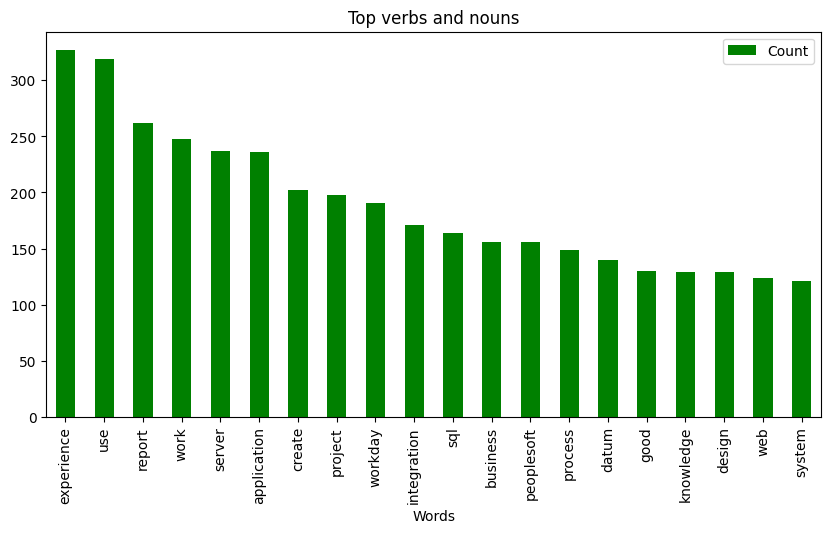

In [71]:
df[0:20].plot.bar(x='Words', figsize=(10,5), title='Top verbs and nouns',color='green')

In [72]:
feature_names = cv.get_feature_names_out()
print(feature_names[100:200])

['application' 'application apply' 'application apply patch'
 'application create' 'application create multiple' 'application design'
 'application design many' 'application designer'
 'application designer application' 'application designer datum'
 'application development' 'application engine'
 'application engine component' 'application engine load'
 'application engine people' 'application engine program'
 'application hrm' 'application interface' 'application management'
 'application management task' 'application package'
 'application package peoplesoft' 'application report'
 'application server' 'application server domain'
 'application server process' 'application server web'
 'application update' 'application upgrade' 'application use'
 'application use html' 'application work' 'apply' 'apply application'
 'apply application apply' 'apply environment'
 'apply environment maintain' 'apply fix' 'apply fix patch' 'apply patch'
 'apply patch bundle' 'apply patch fix' 'apply patch

In [73]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [74]:
Countvector=pd.DataFrame(bow_matrix_ngram.toarray(),columns=cv.get_feature_names_out())

In [75]:
Countvector

,ability,ability work,ability work team,absence,absence condition,absence condition rule,absence management,academic,academic percentage,acceptable,...,year month skill,year professional,year professional experience,year workday,year workday hcm,yii,yii frame,yii frame work,yonder,zp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,1,0,0,7,2,2,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
76,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
Data=new_df = CopyData[['JobPost', 'FinalData']]

In [77]:
Data 

,JobPost,FinalData
0,React_JS,name ravali p curriculum vitae specialization ...
1,React_JS,susovan bag seek challenge position field scie...
2,React_JS,kanumuru deepak reddy career objective secure ...
3,React_JS,haripriya battina experience ui developer reac...
4,React_JS,kamalakar reddy link professional summary year...
...,...,...
74,workday,none
75,workday,seek suitable position workday hcm techno func...
76,workday,workday hcm fcm name kumar role workday consul...
77,workday,none


# WordCloud 

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [79]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [80]:
value_counts = CopyData['JobPost'].value_counts()

In [81]:
value_counts

React_JS                           24
workday                            21
Peoplesoft                         20
SQL Developer Lightning insight    14
Name: JobPost, dtype: int64

In [82]:
import seaborn as sns

In [83]:
file_path   = r'C:\Users\KARTHIK\Downloads\Resumes-20220812T140008ZIP'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    print(file_path)
    print(folder)
    folder_path = file_path+"\\" + folder
    print(folder_path)
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

C:\Users\KARTHIK\Downloads\Resumes-20220812T140008ZIP
Resumes
C:\Users\KARTHIK\Downloads\Resumes-20220812T140008ZIP\Resumes


In [84]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab 

In [85]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

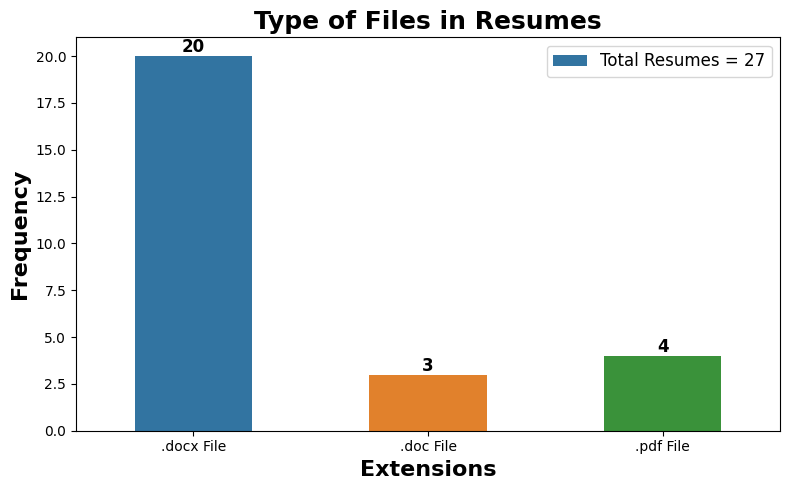

In [86]:
fig, axe = plt.subplots(1,1, figsize=(8,5), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

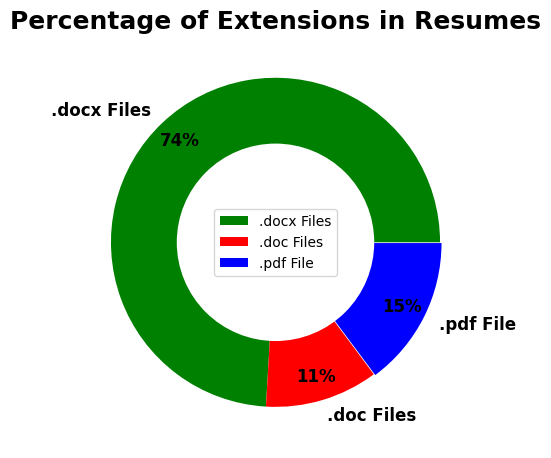

In [87]:
fig = plt.figure(figsize=(5,5), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['g', 'r', 'b']
explode = (0.00, 0.00, 0.01) 

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

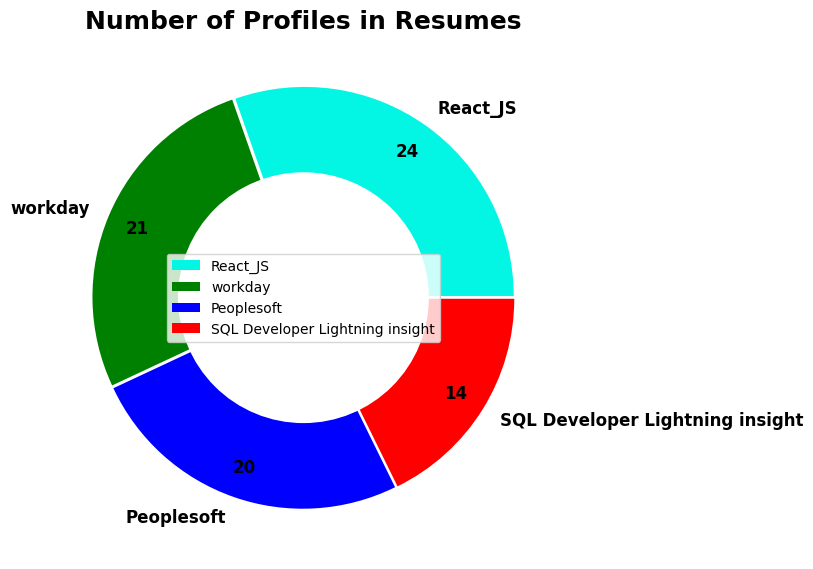

In [88]:
fig = plt.figure(figsize=(8,8))

sizes = CopyData.JobPost.value_counts()
labels = CopyData.JobPost.value_counts().index
colors = ['#03F6E4', 'g', 'b', 'r'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

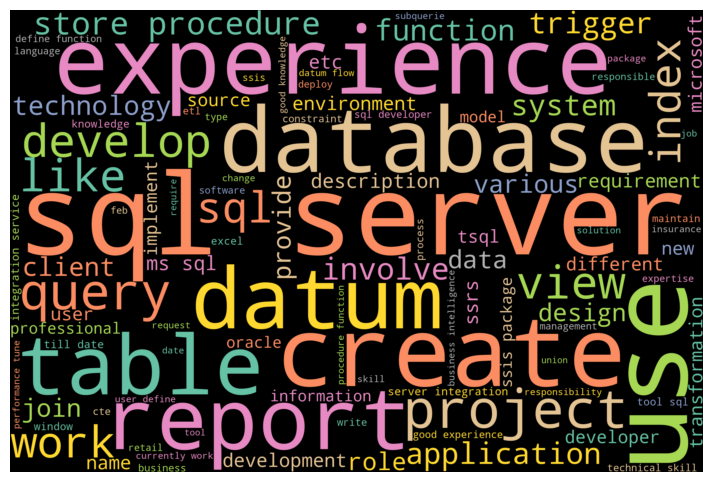

In [89]:
SQL = Data[Data['JobPost'] == 'SQL Developer Lightning insight']  # Filter rows where JobPost is 'React_JS'
words = np.array(SQL['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

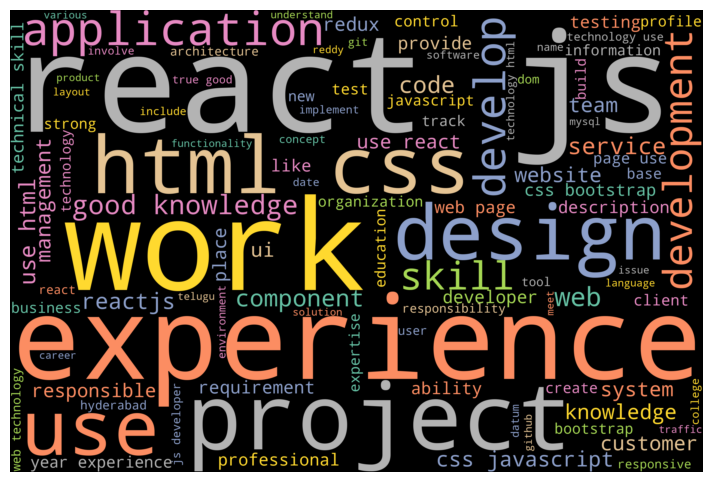

In [90]:
react_js_data = Data[Data['JobPost'] == 'React_JS']  # Filter rows where JobPost is 'React_JS'
words = np.array(react_js_data['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

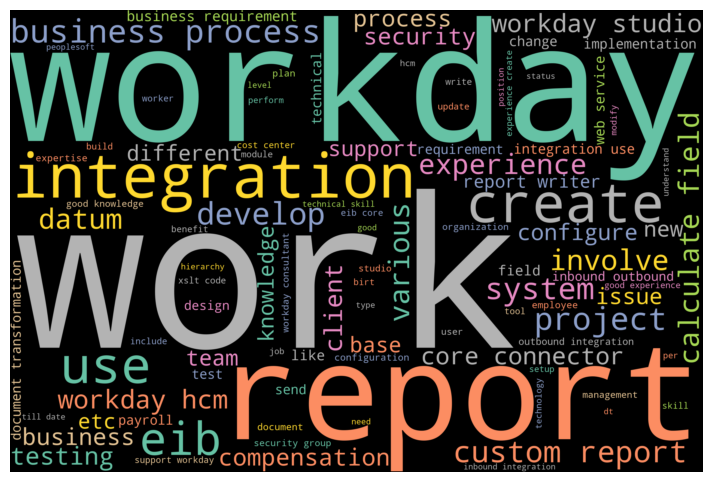

In [91]:
workday = Data[Data['JobPost'] == 'workday']  # Filter rows where JobPost is 'React_JS'
words = np.array(workday['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

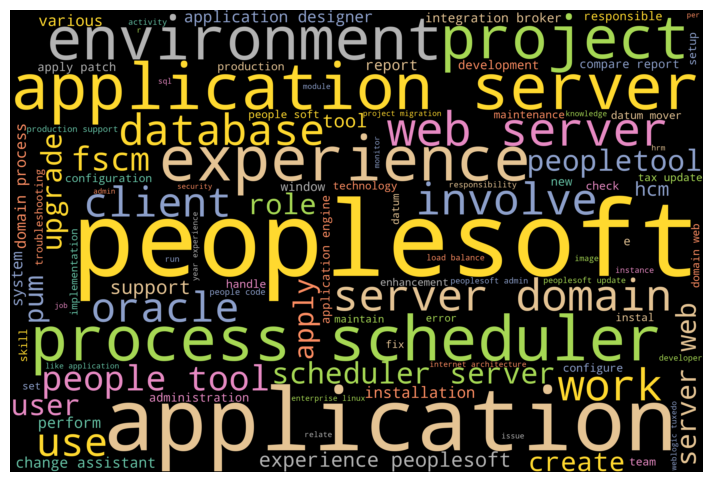

In [92]:
Peoplesoft = Data[Data['JobPost'] == 'Peoplesoft']  # Filter rows where JobPost is 'React_JS'
words = np.array(Peoplesoft['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
b=np.array(Data["FinalData"])

In [95]:
tv=TfidfVectorizer()
b=tv.fit_transform(b).toarray()
tv.vocabulary_

{'name': 1527,
 'ravali': 1922,
 'curriculum': 553,
 'vitae': 2580,
 'specialization': 2218,
 'computer': 438,
 'science': 2086,
 'engg': 785,
 'utilize': 2530,
 'technical': 2372,
 'skill': 2184,
 'achieve': 22,
 'target': 2358,
 'develop': 648,
 'good': 991,
 'performance': 1714,
 'organization': 1634,
 'manual': 1390,
 'testing': 2397,
 'strong': 2289,
 'knowledge': 1283,
 'sdlc': 2100,
 'concept': 440,
 'extensive': 855,
 'white': 2624,
 'box': 286,
 'test': 2395,
 'functional': 948,
 'integration': 1181,
 'extreme': 860,
 'system': 2344,
 'adhoc': 40,
 'reliability': 1979,
 'exploratory': 849,
 'stlc': 2274,
 'case': 345,
 'scenario': 2077,
 'globalization': 980,
 'compatibility': 424,
 'regression': 1971,
 'plan': 1751,
 'agile': 65,
 'methdology': 1445,
 'scrum': 2099,
 'methodology': 1448,
 'expertise': 848,
 'sprint': 2229,
 'planning': 1752,
 'meet': 1435,
 'retrospective': 2031,
 'product': 1835,
 'backlog': 212,
 'meeting': 1436,
 'bug': 305,
 'triage': 2463,
 'normalizatio

In [96]:
TFIDF=pd.DataFrame(b,columns=tv.get_feature_names_out())
TFIDF

,abdul,ability,able,abovementione,absence,abstract,abstraction,academic,accept,acceptable,...,xpath,xslt,xtt,year,yield,yii,yogi,yonder,zero,zp
0,0.0,0.000000,0.0,0.055556,0.000000,0.0,0.060815,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.068646,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.038618,0.000000,0.0,...,0.0,0.000000,0.000000,0.036640,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.069184,0.000000,0.0,0.000000,0.051440,0.000000,0.0,...,0.0,0.000000,0.000000,0.024402,0.0,0.0,0.0,0.151467,0.0,0.0
4,0.0,0.035968,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.022772,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
75,0.0,0.016521,0.0,0.000000,0.166522,0.0,0.000000,0.000000,0.032462,0.0,...,0.0,0.063959,0.027663,0.031379,0.0,0.0,0.0,0.000000,0.0,0.0
76,0.0,0.000000,0.0,0.000000,0.020974,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.075186,0.024390,0.009222,0.0,0.0,0.0,0.000000,0.0,0.0
77,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [97]:
import pickle

In [98]:
file_path = "vectorizzzer.pkl"

In [99]:
with open(file_path, "wb") as f:
    pickle.dump(tv, f)

In [100]:
Data 

,JobPost,FinalData
0,React_JS,name ravali p curriculum vitae specialization ...
1,React_JS,susovan bag seek challenge position field scie...
2,React_JS,kanumuru deepak reddy career objective secure ...
3,React_JS,haripriya battina experience ui developer reac...
4,React_JS,kamalakar reddy link professional summary year...
...,...,...
74,workday,none
75,workday,seek suitable position workday hcm techno func...
76,workday,workday hcm fcm name kumar role workday consul...
77,workday,none


In [101]:
Data['JobPost'].unique()

array(['React_JS', 'Peoplesoft', 'SQL Developer Lightning insight',
       'workday'], dtype=object)

# Logistic Regression

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
label= LabelEncoder()
Data['JobPost']=label.fit_transform(Data['JobPost'])

C:\Users\KARTHIK\AppData\Local\Temp\ipykernel_18140\2147056961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['JobPost']=label.fit_transform(Data['JobPost'])


In [104]:
Data['JobPost'].unique()

array([1, 0, 2, 3])

In [105]:
Data 

,JobPost,FinalData
0,1,name ravali p curriculum vitae specialization ...
1,1,susovan bag seek challenge position field scie...
2,1,kanumuru deepak reddy career objective secure ...
3,1,haripriya battina experience ui developer reac...
4,1,kamalakar reddy link professional summary year...
...,...,...
74,3,none
75,3,seek suitable position workday hcm techno func...
76,3,workday hcm fcm name kumar role workday consul...
77,3,none


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
XTrain_Data,XTest_Data,YTrain_Data,YTest_Data=train_test_split(Data['FinalData'],Data['JobPost'],random_state=42,test_size=0.20,stratify=Data['JobPost'])

In [108]:
XTrain,XTest,YTrain,YTest=train_test_split(TFIDF,Data['JobPost'],random_state=42,test_size=0.20,stratify=Data['JobPost'])

In [109]:
print('Train & Test Split is:')
XTrain.shape, XTest.shape

Train & Test Split is:


((63, 2677), (16, 2677))

In [110]:
from sklearn.pipeline import Pipeline

In [111]:
from sklearn.linear_model import LogisticRegression 

In [112]:
LRmodelpipeline=Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression(random_state=42))])

In [113]:
LRmodelpipeline.fit(XTrain_Data,YTrain_Data)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(random_state=42))])

In [114]:
YTrue=LRmodelpipeline.predict(XTest_Data)

In [115]:
from sklearn.metrics import classification_report

In [116]:
LR_Report=classification_report(YTrue,YTest_Data)

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [118]:
cmlr=confusion_matrix(YTrue,YTest)

In [119]:
report=LR_Report

In [120]:
lines = LR_Report.strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
lr_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", lr_f1_score)

Total F1-score: 0.88


Text(45.722222222222214, 0.5, 'Actual')

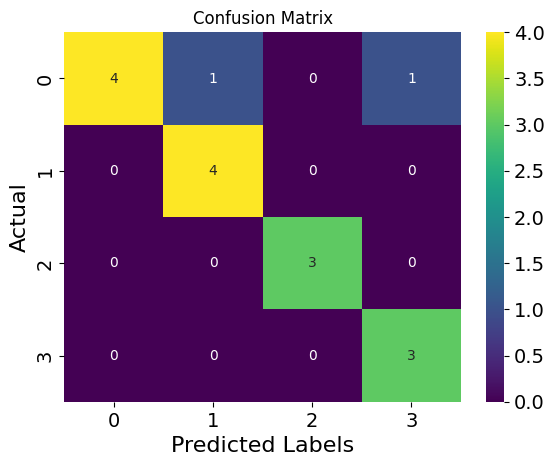

In [121]:
sns.heatmap(cmlr,annot=True,cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")

# Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
best_model_dt=DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=4, min_samples_split=5)

In [124]:
best_model_dt

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5)

In [125]:
best_model_dt.fit(XTrain,YTrain)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5)

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.40      1.00      0.57         2
           2       1.00      0.75      0.86         4
           3       0.75      1.00      0.86         3

    accuracy                           0.75        16
   macro avg       0.79      0.83      0.75        16
weighted avg       0.88      0.75      0.76        16

[[4 2 0 1]
 [0 2 0 0]
 [0 1 3 0]
 [0 0 0 3]]


Text(45.722222222222214, 0.5, 'Actual')

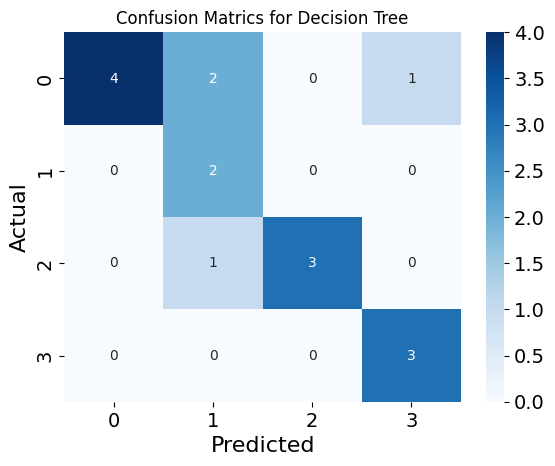

In [126]:
YTruedt=best_model_dt.predict(XTest)
plt.title("Classification Report for Decision Tree")
DT_Report=classification_report(YTruedt,YTest)
print(DT_Report)
print("=====================================================================")
cmdt=confusion_matrix(YTruedt,YTest)
print(cmdt)
sns.heatmap(cmdt,annot=True,cmap='Blues')
plt.title("Confusion Matrics for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [127]:
lines = DT_Report.strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
dt_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", dt_f1_score)

Total F1-score: 0.75


# Random Forest 

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
best_model_rf=RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50)

In [135]:
best_model_rf.fit(XTrain,YTrain)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=50)

Classification report for Random forest
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.60      0.75      0.67         4
           2       0.67      1.00      0.80         2
           3       0.75      1.00      0.86         3

    accuracy                           0.75        16
   macro avg       0.75      0.83      0.76        16
weighted avg       0.81      0.75      0.75        16

============= ======= =======================
[[4 2 0 1]
 [0 3 1 0]
 [0 0 2 0]
 [0 0 0 3]]


Text(45.722222222222214, 0.5, 'Actual')

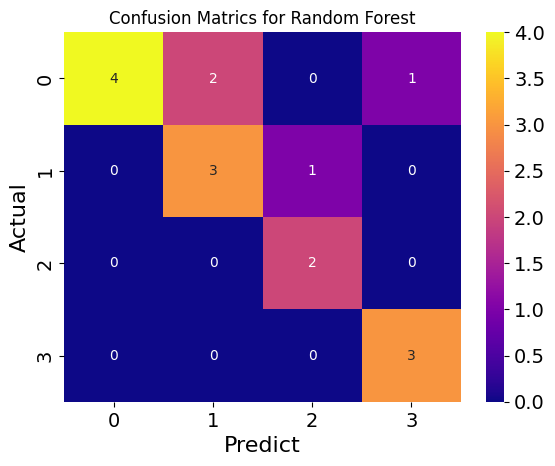

In [136]:
Ytruerf=best_model_rf.predict(XTest)
print("Classification report for Random forest")
print(classification_report(Ytruerf,YTest))
print("============= ======= =======================")
cmrf=confusion_matrix(Ytruerf,YTest)
print(cmrf)
sns.heatmap(cmrf,annot=True,cmap='plasma')
plt.title("Confusion Matrics for Random Forest")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [137]:
lines = classification_report(Ytruerf,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
rf_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", rf_f1_score)

Total F1-score: 0.75


# Ada Boost

In [138]:
from sklearn.ensemble import AdaBoostClassifier

In [145]:
best_model_ada=AdaBoostClassifier(learning_rate=0.001, n_estimators=300)

Classification report for AdaBoost
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         3
           3       1.00      0.57      0.73         7

    accuracy                           0.81        16
   macro avg       0.84      0.89      0.83        16
weighted avg       0.88      0.81      0.81        16

============= ======= =======================
[[3 0 0 0]
 [0 3 0 0]
 [0 0 3 0]
 [1 2 0 4]]


Text(45.722222222222214, 0.5, 'Actual')

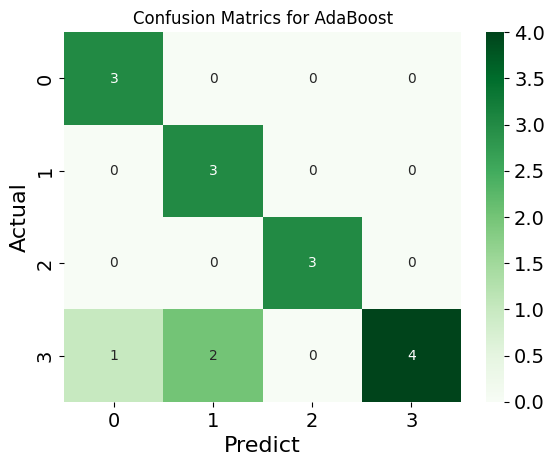

In [146]:
best_model_ada.fit(XTrain,YTrain)
Ytrueada=best_model_ada.predict(XTest)
print("Classification report for AdaBoost")
print(classification_report(Ytrueada,YTest))
print("============= ======= =======================")
cmada=confusion_matrix(Ytrueada,YTest)
print(cmada)
sns.heatmap(cmada,annot=True,cmap='Greens')
plt.title("Confusion Matrics for AdaBoost")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [147]:
lines = classification_report(Ytrueada,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
ada_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", ada_f1_score)

Total F1-score: 0.81


# SVM

In [148]:
from sklearn.svm import SVC

In [149]:
import numpy as np

In [150]:
import random

In [155]:
best_model_svm=SVC(C= 1, gamma= 0.1, kernel='linear')

Classification report for SVM
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3

    accuracy                           0.88        16
   macro avg       0.89      0.92      0.89        16
weighted avg       0.90      0.88      0.87        16

============= ======= =======================
[[4 1 0 1]
 [0 4 0 0]
 [0 0 3 0]
 [0 0 0 3]]


Text(45.722222222222214, 0.5, 'Actual')

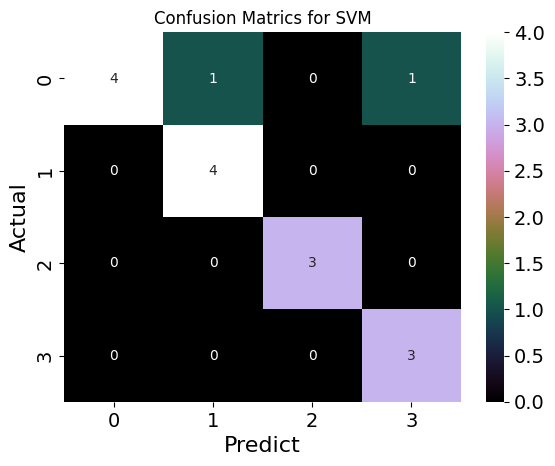

In [156]:
#best_model_svm=gcvsvm.best_estimator_
best_model_svm.fit(XTrain,YTrain)
Ytruesvm=best_model_svm.predict(XTest)
print("Classification report for SVM")
print(classification_report(Ytruesvm,YTest))
print("============= ======= =======================")
cmsvm=confusion_matrix(Ytruesvm,YTest)
print(cmsvm)
sns.heatmap(cmsvm,annot=True,cmap='cubehelix')
plt.title("Confusion Matrics for SVM")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [157]:
lines = classification_report(Ytruesvm,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
svm_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", svm_f1_score)

Total F1-score: 0.88


# Linear SVC

In [158]:
from sklearn.svm import LinearSVC

In [163]:
best_lsvm_model=LinearSVC(C=1)

Classification report for LinearSVM
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3

    accuracy                           0.88        16
   macro avg       0.89      0.92      0.89        16
weighted avg       0.90      0.88      0.87        16

============= ======= =======================
[[4 1 0 1]
 [0 4 0 0]
 [0 0 3 0]
 [0 0 0 3]]


Text(45.722222222222214, 0.5, 'Actual')

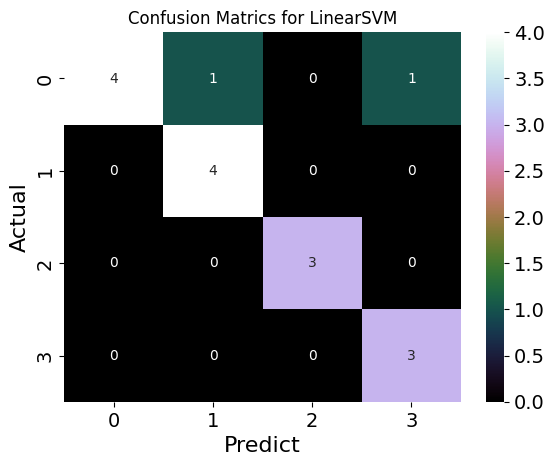

In [164]:
best_lsvm_model.fit(XTrain,YTrain)
Ytruelsvm=best_lsvm_model.predict(XTest)
print("Classification report for LinearSVM")
print(classification_report(Ytruelsvm,YTest))
print("============= ======= =======================")
cmlsvm=confusion_matrix(Ytruelsvm,YTest)
print(cmlsvm)
sns.heatmap(cmlsvm,annot=True,cmap='cubehelix')
plt.title("Confusion Matrics for LinearSVM")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [165]:
lines = classification_report(Ytruelsvm,YTest).strip().split('\n')
total_f1_score_line = lines[-1]  # Last line contains the weighted average F1-score
lsvm_f1_score = float(total_f1_score_line.split()[3])  # Extract the F1-score value

print("Total F1-score:", lsvm_f1_score)

Total F1-score: 0.88


# Logistic

In [166]:
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

In [167]:
# split data the data into training and testing
x = Data['FinalData']
y = Data['JobPost']

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [169]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(55,)
(24,)
(55,)
(24,)


In [170]:
xtrain_v = vect.fit_transform(xtrain)
xtest_v = vect.transform(xtest)

In [171]:
# apply labelencoder to traget column
lb = LabelEncoder()
y = lb.fit_transform(y)

In [172]:
y 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [173]:
import warnings
warnings.filterwarnings('ignore')
vect.get_feature_names()

['ability',
 'able',
 'abovementione',
 'absence',
 'abstract',
 'abstraction',
 'academic',
 'acceptable',
 'acceptance',
 'access',
 'accessibility',
 'acclimatize',
 'accomplish',
 'accord',
 'account',
 'accountant',
 'accounting',
 'accuracy',
 'achieve',
 'achievement',
 'acquisition',
 'across',
 'acs',
 'act',
 'action',
 'actionable',
 'activate',
 'active',
 'actively',
 'activity',
 'adapt',
 'adaptability',
 'add',
 'additional',
 'additionally',
 'address',
 'adhoc',
 'admin',
 'administer',
 'administrate',
 'administration',
 'administrator',
 'admission',
 'adopt',
 'adp',
 'advance',
 'advanced',
 'advantage',
 'aetna',
 'affect',
 'affiliate',
 'affirm',
 'aforementione',
 'age',
 'agent',
 'aggregate',
 'aggregator',
 'aggrid',
 'agile',
 'agility',
 'agk',
 'agriculture',
 'agsp',
 'aid',
 'aim',
 'airlines',
 'aix',
 'ajax',
 'ak',
 'alert',
 'algorithm',
 'allegis',
 'allow',
 'allowance',
 'along',
 'also',
 'alter',
 'alteraudit',
 'always',
 'amazon',
 'amazonc

In [174]:
nb = MultinomialNB()
nb.fit(xtrain_v,ytrain)

MultinomialNB()

In [175]:
ypred = nb.predict(xtest_v)
ypred

array([3, 3, 2, 0, 1, 3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 3, 3, 3, 0, 1, 3, 3,
       1, 1])

In [176]:
nb.score(xtrain_v,ytrain), nb.score(xtest_v,ytest)

(0.8, 0.75)

In [177]:
#tuning the CountVectorizer
vect = CountVectorizer(ngram_range=(1,2),stop_words='english')
xtrain_v = vect.fit_transform(xtrain)
xtest_v = vect.transform(xtest)
print('No. of features:',xtrain_v.shape[1])

nb.fit(xtrain_v,ytrain)

#make class prediction for xtrain_v and xtest_v
y_pred_xtrain = nb.predict(xtrain_v)
y_pred_xtest = nb.predict(xtest_v)


No. of features: 10818


In [178]:
from sklearn import metrics
print('Training Accuracy:',metrics.accuracy_score(ytrain,y_pred_xtrain))
print('Testing Accuracy:',metrics.accuracy_score(ytest,y_pred_xtest))

Training Accuracy: 0.7090909090909091
Testing Accuracy: 0.7083333333333334


In [180]:
vect.vocabulary_

{'vinay': 10335,
 'kumar': 5124,
 'workday': 10629,
 'functional': 3741,
 'consultant': 1698,
 'expertise': 3388,
 'summary': 9095,
 'year': 10789,
 'total': 9641,
 'experience': 3278,
 'knowledge': 5039,
 'module': 5789,
 'core': 1811,
 'hcm': 4029,
 'supervisory': 9118,
 'organization': 6266,
 'delegation': 2338,
 'cost': 1828,
 'center': 1137,
 'location': 5341,
 'security': 8248,
 'implement': 4288,
 'integration': 4577,
 'various': 10221,
 'include': 4366,
 'compensation': 1464,
 'time': 9566,
 'track': 9653,
 'absence': 16,
 'management': 5502,
 'payroll': 6477,
 'benefit': 793,
 'performance': 6614,
 'good': 3870,
 'group': 3923,
 'role': 8020,
 'base': 734,
 'user': 10134,
 'job': 4887,
 'experienced': 3381,
 'report': 7636,
 'write': 10730,
 'custom': 2027,
 'simple': 8558,
 'advanced': 201,
 'matrix': 5618,
 'composite': 1535,
 'calculate': 1057,
 'field': 3541,
 'eib': 2932,
 'connectors': 1665,
 'xml': 10760,
 'xslt': 10774,
 'web': 10405,
 'service': 8405,
 'structure': 90